<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación matemática. 

**Nombres:** María del Carmen Martínez Hernández.

**Fecha:** 10 de octubre del 2022.

**Expediente** : NT729340.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MMHdez/T7MariaMartinez

# Tarea 6: Clase 10

## TAREA 6
1. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 1, 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

**Entregable: se debe subir un archivo con extensión .ipnyb y nombrarlo con el formato T7PrimerNombrePrimerApellido.ipynb**

In [126]:
# importar librería numpy
import numpy as np

# Importar librería pandas
import pandas as pd

# Importar librería para graficar
import matplotlib.pyplot as plt

In [127]:
# Escribir la función 
def montecarlo2(region, a1, b1, a2, b2, N):
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    bi = region(x, y)
    AD_approx = AR*np.mean(bi)
    return AD_approx

In [128]:
# Definir la función del área de la región a aproximar
def region(x, y):
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

In [106]:
# Definir ejes
xnum = np.linspace(-3, 1, 2000)
ynum = np.linspace(0.5, 3.5, 2000)

X, Y = np.meshgrid(xnum, ynum)

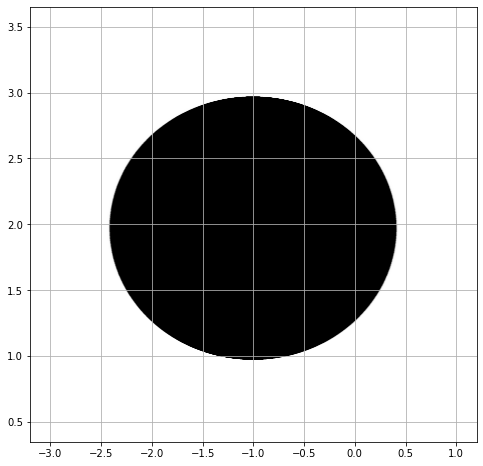

In [107]:
##~
plt.figure(figsize=(8, 8))

# Graficar los puntos del rectangulo R que estan dentro de la region D
plt.scatter(X, Y, c=~region(X,Y), cmap='bone') 

plt.grid()
plt.show()

In [152]:
# Resolver
a1, b1, a2, b2 = -3, 1, 0, 4

# Establecer la cantidad de términos a utilizar para la aproximación
N = np.logspace(0, 5, 6).astype(int)

# Crear la tabla (DataFrame de pandas)
tabla2 = pd.DataFrame(index = N, columns=['Aproximación', 'Error relativo' ])

for n in N:
    area_aprox = montecarlo2(region, a1, b1, a2, b2, n)
    tabla2.loc[n, 'Aproximación'] = area_aprox
    tabla2['Error relativo'] = 100*np.abs(tabla2['Aproximación'] - np.pi)/np.pi

tabla2

,Aproximación,Error relativo
1,0.0,100.0
10,4.8,52.788745
100,4.96,57.881704
1000,4.176,32.926208
10000,4.5968,46.320688
100000,4.4432,41.431449


**Conclusión:** El área se aproxima cada vez más al área real con un valor cercano a  $2 u^2$
